In [2]:
!pip install TA-Lib


# %%
# ‡∏ô‡∏≥‡πÄ‡∏Ç‡πâ‡∏≤‡πÑ‡∏•‡∏ö‡∏£‡∏≤‡∏£‡∏µ‡∏ó‡∏µ‡πà‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å Excel ‡πÅ‡∏ó‡∏ô yfinance
file_path = 'Agriculture and food industry_5y_data.xlsx'  # üîÅ ‡πÄ‡∏õ‡∏•‡∏µ‡πà‡∏¢‡∏ô‡∏ä‡∏∑‡πà‡∏≠‡πÑ‡∏ü‡∏•‡πå‡∏ï‡∏≤‡∏°‡∏Ç‡∏≠‡∏á‡∏à‡∏£‡∏¥‡∏á
df = pd.read_excel(file_path)

# ‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö‡∏ß‡πà‡∏≤‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå 'Date' ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô index ‡∏´‡∏£‡∏∑‡∏≠‡πÄ‡∏õ‡∏•‡πà‡∏≤
if df.index.name == 'Date':
    df = df.reset_index()

# ‡∏Å‡∏£‡∏≠‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡πÉ‡∏´‡πâ‡∏°‡∏µ‡πÄ‡∏â‡∏û‡∏≤‡∏∞‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£ (‡∏ñ‡πâ‡∏≤‡∏°‡∏µ‡∏°‡∏≤‡∏Å‡∏Å‡∏ß‡πà‡∏≤‡∏ô‡∏µ‡πâ‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå)
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

# ‡πÅ‡∏õ‡∏•‡∏á‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå Date ‡πÉ‡∏´‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÉ‡∏ô‡∏£‡∏π‡∏õ datetime (‡∏ñ‡πâ‡∏≤‡∏¢‡∏±‡∏á‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÅ‡∏õ‡∏•‡∏á)
df['Date'] = pd.to_datetime(df['Date'])

# ‡∏î‡∏π‡∏ï‡∏±‡∏ß‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•
print(df.head())


# %%
import pandas as pd
import talib as ta

# 1. ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å‡∏ó‡∏∏‡∏Å‡∏ä‡∏µ‡∏ï‡πÉ‡∏ô‡πÑ‡∏ü‡∏•‡πå Excel
file_path = 'Agriculture and food industry_5y_data.xlsx'
sheets_dict = pd.read_excel(file_path, sheet_name=None)

period = 14
processed_dict = {}

def rsi_signal(rsi):
    if rsi >= 70:
        return "SELL"
    elif rsi <= 30:
        return "BUY"
    else:
        return ""

def signal_to_binary(signal):
    if signal == "BUY":
        return 1
    else:
        return 0

for sheet_name, df in sheets_dict.items():
    if df.index.name == 'Date':
        df = df.reset_index()

    df['Date'] = pd.to_datetime(df['Date'])
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]

    df['EMA25'] = ta.EMA(df['Close'], timeperiod=25)
    df['EMA75'] = ta.EMA(df['Close'], timeperiod=75)
    df['EMA200'] = ta.EMA(df['Close'], timeperiod=200)
    df['RSI'] = ta.RSI(df['Close'], timeperiod=period)

    macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_signal'] = macdsignal
    df['MACD_hist'] = macdhist

    df['Change'] = df['Close'].diff()
    df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
    df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

    df['Avg Gain'] = df['Gain'].rolling(window=period).mean()
    df['Avg Loss'] = df['Loss'].rolling(window=period).mean()

    df['RS'] = df.apply(lambda row: row['Avg Gain'] / row['Avg Loss'] if row['Avg Loss'] != 0 else 100, axis=1)

    df['RSI Signal'] = df['RSI'].apply(rsi_signal)

    # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå status ‡πÅ‡∏ö‡∏ö binary target
    df['status'] = df['RSI Signal'].apply(signal_to_binary)

    processed_dict[sheet_name] = df

    # ‡πÅ‡∏™‡∏î‡∏á‡∏Ñ‡πà‡∏≤ unique ‡∏Ç‡∏≠‡∏á status ‡πÉ‡∏ô‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏ä‡∏µ‡∏ï
    print(f"Sheet: {sheet_name} ‚Äî unique values in status: {df['status'].unique()}")

# Export ‡∏ó‡∏∏‡∏Å‡∏ä‡∏µ‡∏ï‡∏Å‡∏•‡∏±‡∏ö‡πÑ‡∏õ‡∏¢‡∏±‡∏á Excel
output_path = '‡∏´‡∏∏‡πâ‡∏ô_processed.xlsx'
with pd.ExcelWriter(output_path, engine='openpyxl') as writer:
    for sheet, df in processed_dict.items():
        df.to_excel(writer, sheet_name=sheet, index=False)





        Date      Open      High       Low     Close     Volume
0 2022-11-01  6.584078  7.500848  6.084021  7.417505  932827900
1 2022-11-02  7.084134  7.459176  6.417392  6.542406  410476300
2 2022-11-03  6.542406  6.917449  6.417392  6.834106  145654900
3 2022-11-04  6.792434  7.000791  6.500735  6.542406  119765500
4 2022-11-07  6.625749  6.625749  6.125693  6.167364   88102200
Sheet: AAI.bk ‚Äî unique values in status: [0 1]
Sheet: APURE.bk ‚Äî unique values in status: [0 1]
Sheet: ASIAN.bk ‚Äî unique values in status: [0 1]
Sheet: BR.bk ‚Äî unique values in status: [0 1]
Sheet: BRR.bk ‚Äî unique values in status: [0 1]
Sheet: BTG.bk ‚Äî unique values in status: [0 1]
Sheet: CBG.bk ‚Äî unique values in status: [0 1]
Sheet: CFRESH.bk ‚Äî unique values in status: [0 1]
Sheet: CH.bk ‚Äî unique values in status: [0 1]
Sheet: CHAO.bk ‚Äî unique values in status: [0 1]
Sheet: CHOTI.bk ‚Äî unique values in status: [0 1]
Sheet: CM.bk ‚Äî unique values in status: [0 1]
Sheet: COCOCO.bk ‚Äî 

In [3]:
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns

# ‡∏≠‡πà‡∏≤‡∏ô‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏à‡∏≤‡∏Å Excel
file_path = '‡∏´‡∏∏‡πâ‡∏ô_processed.xlsx'
df = pd.read_excel(file_path)


In [4]:
df

Date      Open      High       Low     Close     Volume     EMA25  \
0   2022-11-01  6.584078  7.500848  6.084021  7.417505  932827900       NaN   
1   2022-11-02  7.084134  7.459176  6.417392  6.542406  410476300       NaN   
2   2022-11-03  6.542406  6.917449  6.417392  6.834106  145654900       NaN   
3   2022-11-04  6.792434  7.000791  6.500735  6.542406  119765500       NaN   
4   2022-11-07  6.625749  6.625749  6.125693  6.167364   88102200       NaN   
..         ...       ...       ...       ...       ...        ...       ...   
631 2025-06-09  4.300000  4.340000  4.280000  4.300000     726100  4.280726   
632 2025-06-10  4.300000  4.420000  4.280000  4.420000    2126200  4.291440   
633 2025-06-11  4.440000  4.620000  4.400000  4.480000    6072400  4.305944   
634 2025-06-12  4.500000  4.500000  4.340000  4.340000    2845900  4.308564   
635 2025-06-13  4.300000  4.320000  4.240000  4.260000    2451000  4.304828   

        EMA75    EMA200        RSI  ...  MACD_signal  MACD_hist    Change  \
0         NaN       NaN        NaN  ...          NaN        NaN       NaN   
1         NaN       NaN        NaN  ...          NaN        NaN -0.875099   
2         NaN       NaN        NaN  ...          NaN        NaN  0.291700   
3         NaN       NaN        NaN  ...          NaN        NaN -0.291700   
4         NaN       NaN        NaN  ...          NaN        NaN -0.375042   
..        ...       ...        ...  ...          ...        ...       ...   
631  4.522532  4.821014  50.760276  ...     0.004278   0.020801  0.000000   
632  4.519833  4.817024  55.760447  ...     0.009867   0.022355  0.120000   
633  4.518785  4.813671  58.054028  ...     0.016341   0.025896  0.060000   
634  4.514080  4.808957  51.362694  ...     0.020759   0.017675 -0.140000   
635  4.507394  4.803495  47.960854  ...     0.022334   0.006301 -0.080000   

       Gain      Loss  Avg Gain  Avg Loss        RS  RSI Signal status  
0    0.0000  0.000000       NaN       NaN       NaN         NaN      0  
1    0.0000  0.875099       NaN       NaN       NaN         NaN      0  
2    0.2917  0.000000       NaN       NaN       NaN         NaN      0  
3    0.0000  0.291700       NaN       NaN       NaN         NaN      0  
4    0.0000  0.375042       NaN       NaN       NaN         NaN      0  
..      ...       ...       ...       ...       ...         ...    ...  
631  0.0000  0.000000  0.038571  0.031429  1.227274         NaN      0  
632  0.1200  0.000000  0.047143  0.030000  1.571429         NaN      0  
633  0.0600  0.000000  0.047143  0.030000  1.571429         NaN      0  
634  0.0000  0.140000  0.047143  0.040000  1.178572         NaN      0  
635  0.0000  0.080000  0.047143  0.042857  1.100001         NaN      0  

[636 rows x 21 columns]

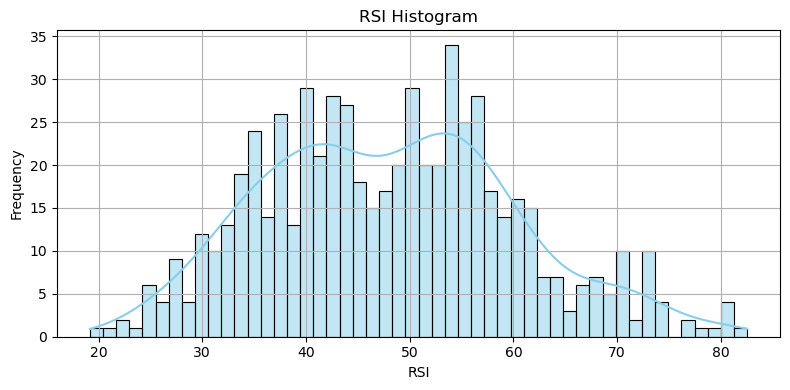

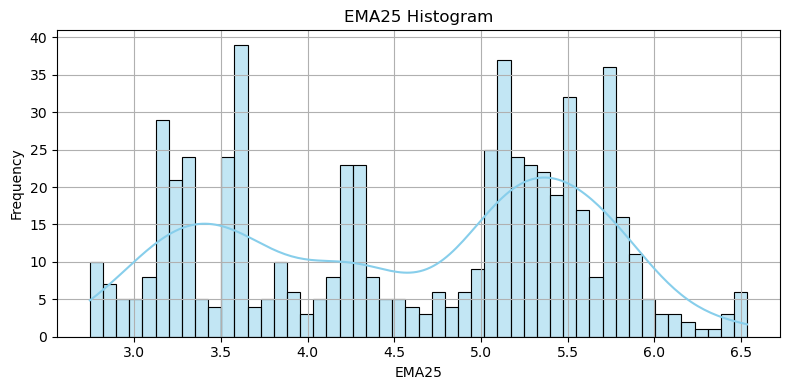

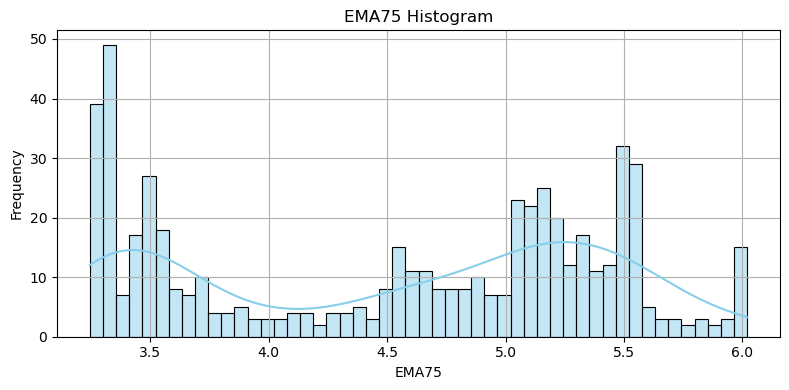

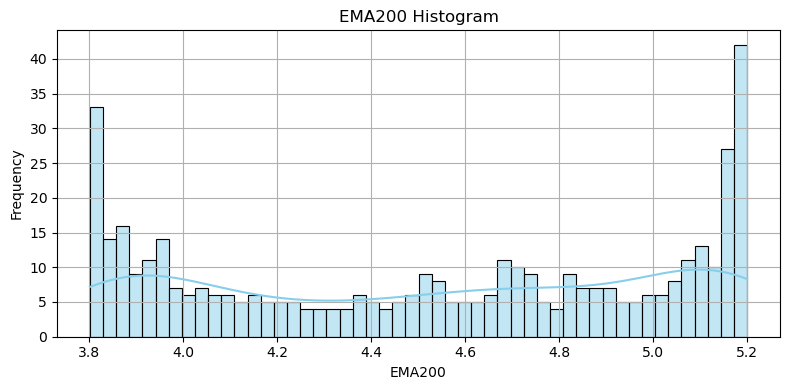

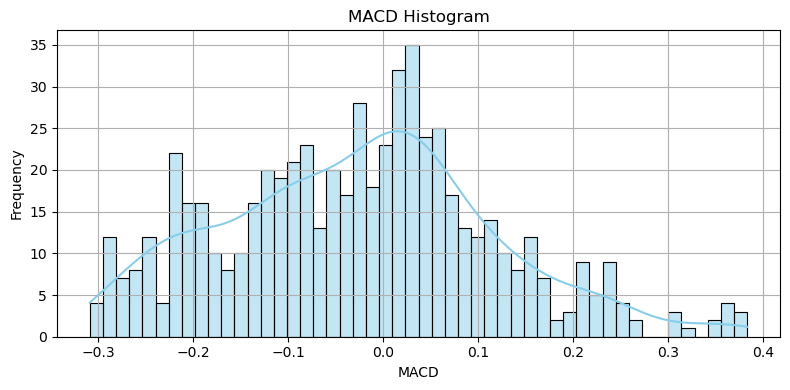

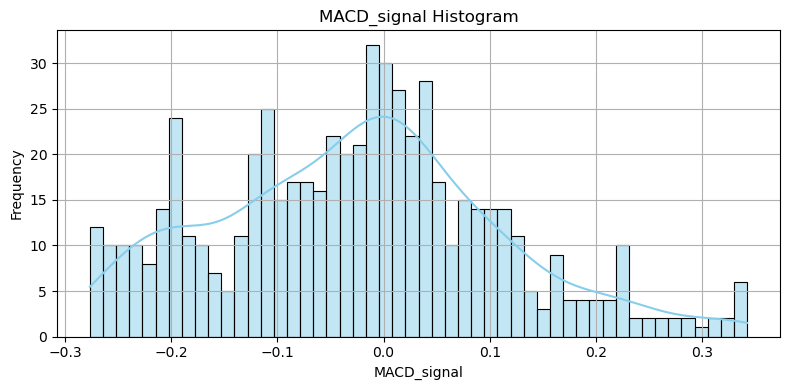

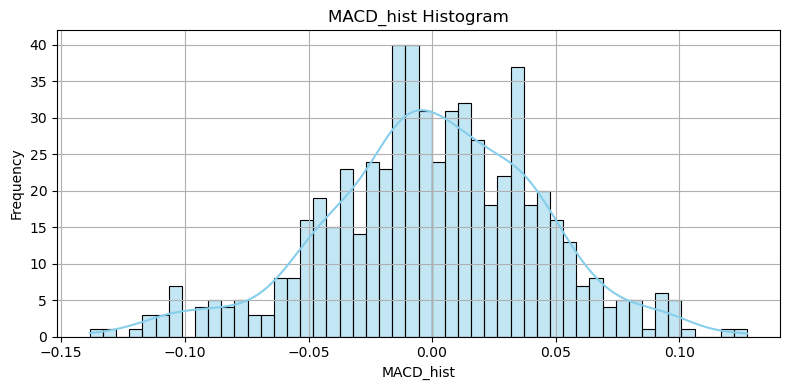

In [5]:

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Histogram ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞‡∏≠‡∏¥‡∏ô‡∏î‡∏¥‡πÄ‡∏Ñ‡πÄ‡∏ï‡∏≠‡∏£‡πå
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

for indicator in indicators:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[indicator].dropna(), bins=50, kde=True, color='skyblue')
    plt.title(f'{indicator} Histogram')
    plt.xlabel(indicator)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

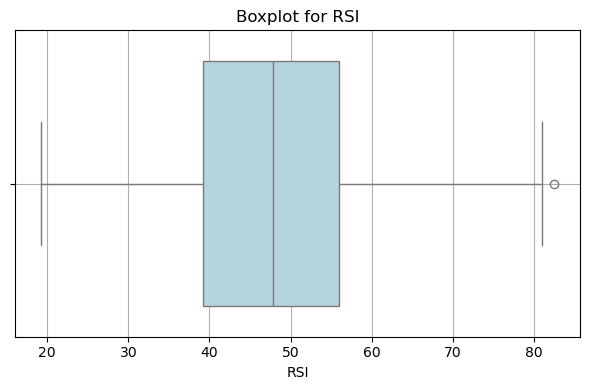

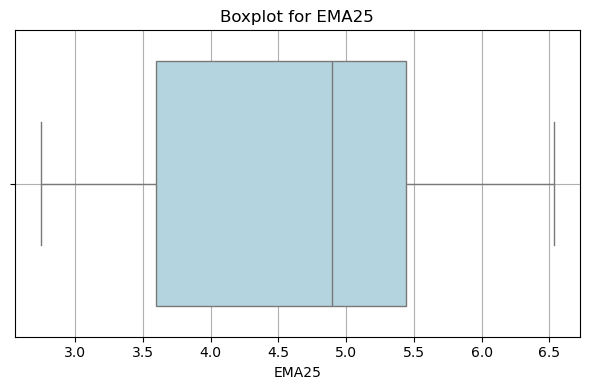

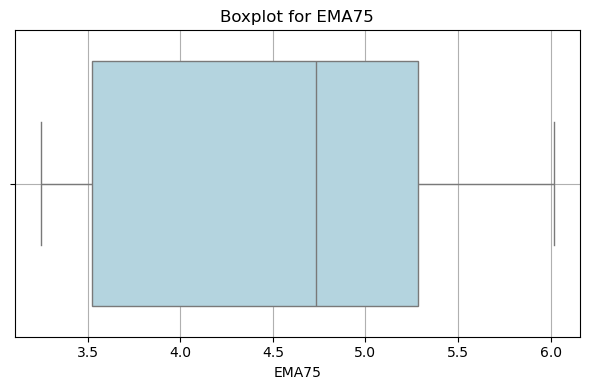

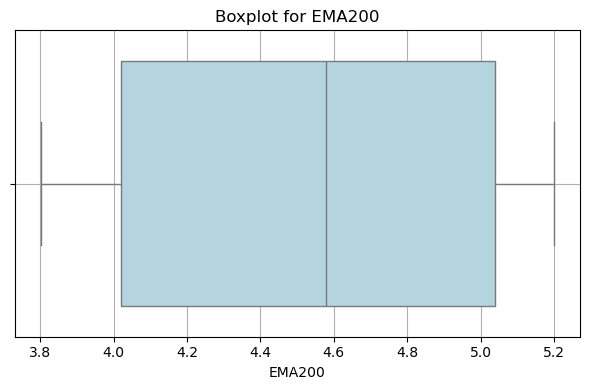

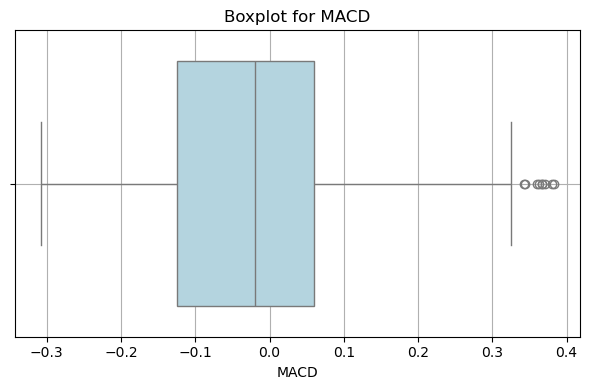

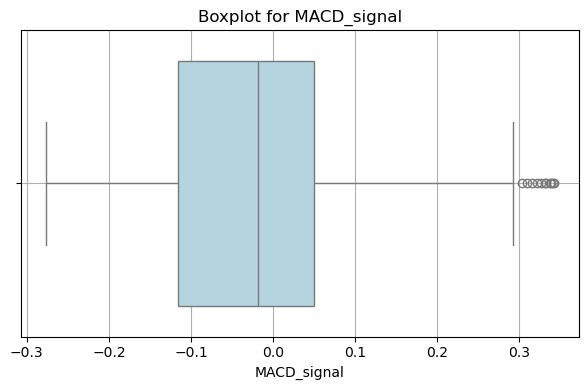

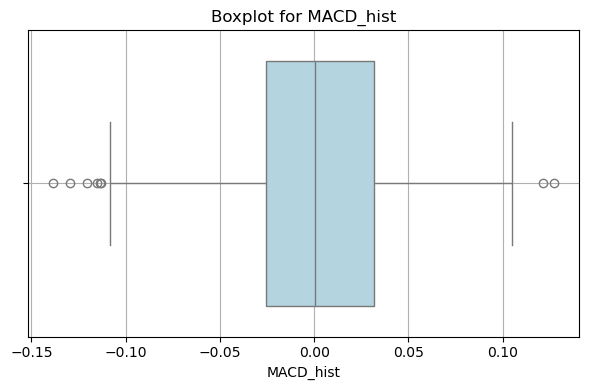

In [6]:
# ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å Indicator ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö
indicators = ['RSI', 'EMA25', 'EMA75', 'EMA200', 'MACD', 'MACD_signal', 'MACD_hist']

# ‡∏™‡∏£‡πâ‡∏≤‡∏á Boxplot ‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡πÅ‡∏ï‡πà‡∏•‡∏∞ Indicator
for indicator in indicators:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[indicator], color='lightblue')
    plt.title(f'Boxplot for {indicator}')
    plt.xlabel(indicator)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def detect_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series < lower_bound) | (series > upper_bound)]

outliers_rsi = detect_outliers(df['RSI'])
print("RSI Outliers:")
print(outliers_rsi)


RSI Outliers:
372    82.540237
Name: RSI, dtype: float64


In [8]:
# ‡πÅ‡∏™‡∏î‡∏á‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡πÅ‡∏ñ‡∏ß‡∏ó‡∏µ‡πà RSI ‡πÄ‡∏õ‡πá‡∏ô outlier
df.loc[372]


Date           2024-05-14 00:00:00
Open                      5.322107
High                      5.458571
Low                       5.276619
Close                     5.458571
Volume                    15039900
EMA25                      4.48098
EMA75                     4.011627
EMA200                    3.936459
RSI                      82.540237
MACD                      0.344003
MACD_signal                0.24596
MACD_hist                 0.098044
Change                    0.136464
Gain                      0.136464
Loss                           0.0
Avg Gain                  0.125001
Avg Loss                  0.016246
RS                        7.694402
RSI Signal                    SELL
status                           0
Name: 372, dtype: object

In [ ]:
import pandas as pd

# ‡∏™‡∏°‡∏°‡∏ï‡∏¥ df ‡∏Ñ‡∏∑‡∏≠ DataFrame ‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏∏‡∏ì

indicators = ['RSI', 'MACD', 'EMA25']  # ‡πÉ‡∏™‡πà‡∏ä‡∏∑‡πà‡∏≠ Indicator ‡∏ó‡∏µ‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡∏ï‡∏£‡∏ß‡∏à‡∏™‡∏≠‡∏ö

outlier_summary = pd.DataFrame()  # ‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ

for ind in indicators:
    Q1 = df[ind].quantile(0.25)
    Q3 = df[ind].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡πÄ‡∏õ‡πá‡∏ô outlier ‡∏Ç‡∏≠‡∏á Indicator ‡∏ô‡∏µ‡πâ
    outliers = df[(df[ind] < lower_bound) | (df[ind] > upper_bound)].copy()
    outliers['Indicator'] = ind  # ‡πÄ‡∏û‡∏¥‡πà‡∏°‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏ä‡∏∑‡πà‡∏≠ Indicator ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ö‡∏≠‡∏Å‡∏ß‡πà‡∏≤‡∏≠‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏Ñ‡∏∑‡∏≠ outlier ‡∏Ç‡∏≠‡∏á‡∏ï‡∏±‡∏ß‡πÑ‡∏´‡∏ô
    
    # ‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏Ñ‡∏≠‡∏•‡∏±‡∏°‡∏ô‡πå‡∏™‡∏≥‡∏Ñ‡∏±‡∏ç‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏Å‡πá‡∏ö‡πÑ‡∏ß‡πâ (‡πÅ‡∏Å‡πâ‡∏ï‡∏≤‡∏°‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏´‡∏°‡∏≤‡∏∞‡∏™‡∏°)
    cols = ['Date', 'Open', 'High', 'Low', 'Close', ind, 'Indicator']
    outliers = outliers[cols]
    
    # ‡∏£‡∏ß‡∏°‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏• outlier ‡∏ó‡∏∏‡∏Å indicator ‡πÄ‡∏Ç‡πâ‡∏≤‡∏î‡πâ‡∏ß‡∏¢‡∏Å‡∏±‡∏ô
    outlier_summary = pd.concat([outlier_summary, outliers])

# ‡πÅ‡∏™‡∏î‡∏á‡∏ú‡∏•‡∏ï‡∏≤‡∏£‡∏≤‡∏á‡∏™‡∏£‡∏∏‡∏õ outlier ‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å Indicator
print(outlier_summary)
